In [94]:
#Netflix 

In [95]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#to read the .csv file
netflix_data = pd.read_csv('netflix1.csv')

In [97]:
#to read the first 3 data
netflix_data.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [98]:
#info() to get a  overview of the DataFrame, showing how many values are missing, and what type of data is present.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


As we can see there are no missing values in the following dataframes.

In [100]:
#to check the rows and coluns in 2d array
netflix_data.shape

(8790, 10)

In [101]:
#to check the data columns
netflix_data.columns.values

array(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'], dtype=object)

In [102]:
netflix_data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


***Data Cleaning


Identify and handle missing data, correct data types and drop duplicates

In [105]:
#check for missing values
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [106]:
#to remove the duplicate values
netflix_data.drop_duplicates(inplace= True)

In [107]:
#Drop rows with missing cirtical info
netflix_data.dropna(subset=['director','country'], inplace=True)

In [108]:
!pip install wordcloud

In [109]:
from wordcloud import WordCloud

In [110]:
#convert 'date_added' to datetime
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [111]:
#data types to confirm the changes
print(netflix_data.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


###Exploratory Data Analysis(EDA)

In [113]:
#Content Type Distribution(Movies vs TV shows)
#count the number of movies and tv shows
type_count=netflix_data['type'].value_counts()
type_count

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

As we can see there are 6126 for movies and 2664 for TV shows

In [115]:
#distribution of release year
release_year_distribution = netflix_data['release_year'].value_counts().sort_index()
release_year_distribution

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

In [116]:
#distibution of rating
rating_distribution = netflix_data['rating'].value_counts()
rating_distribution.head(3)

rating
TV-MA    3205
TV-14    2157
TV-PG     861
Name: count, dtype: int64

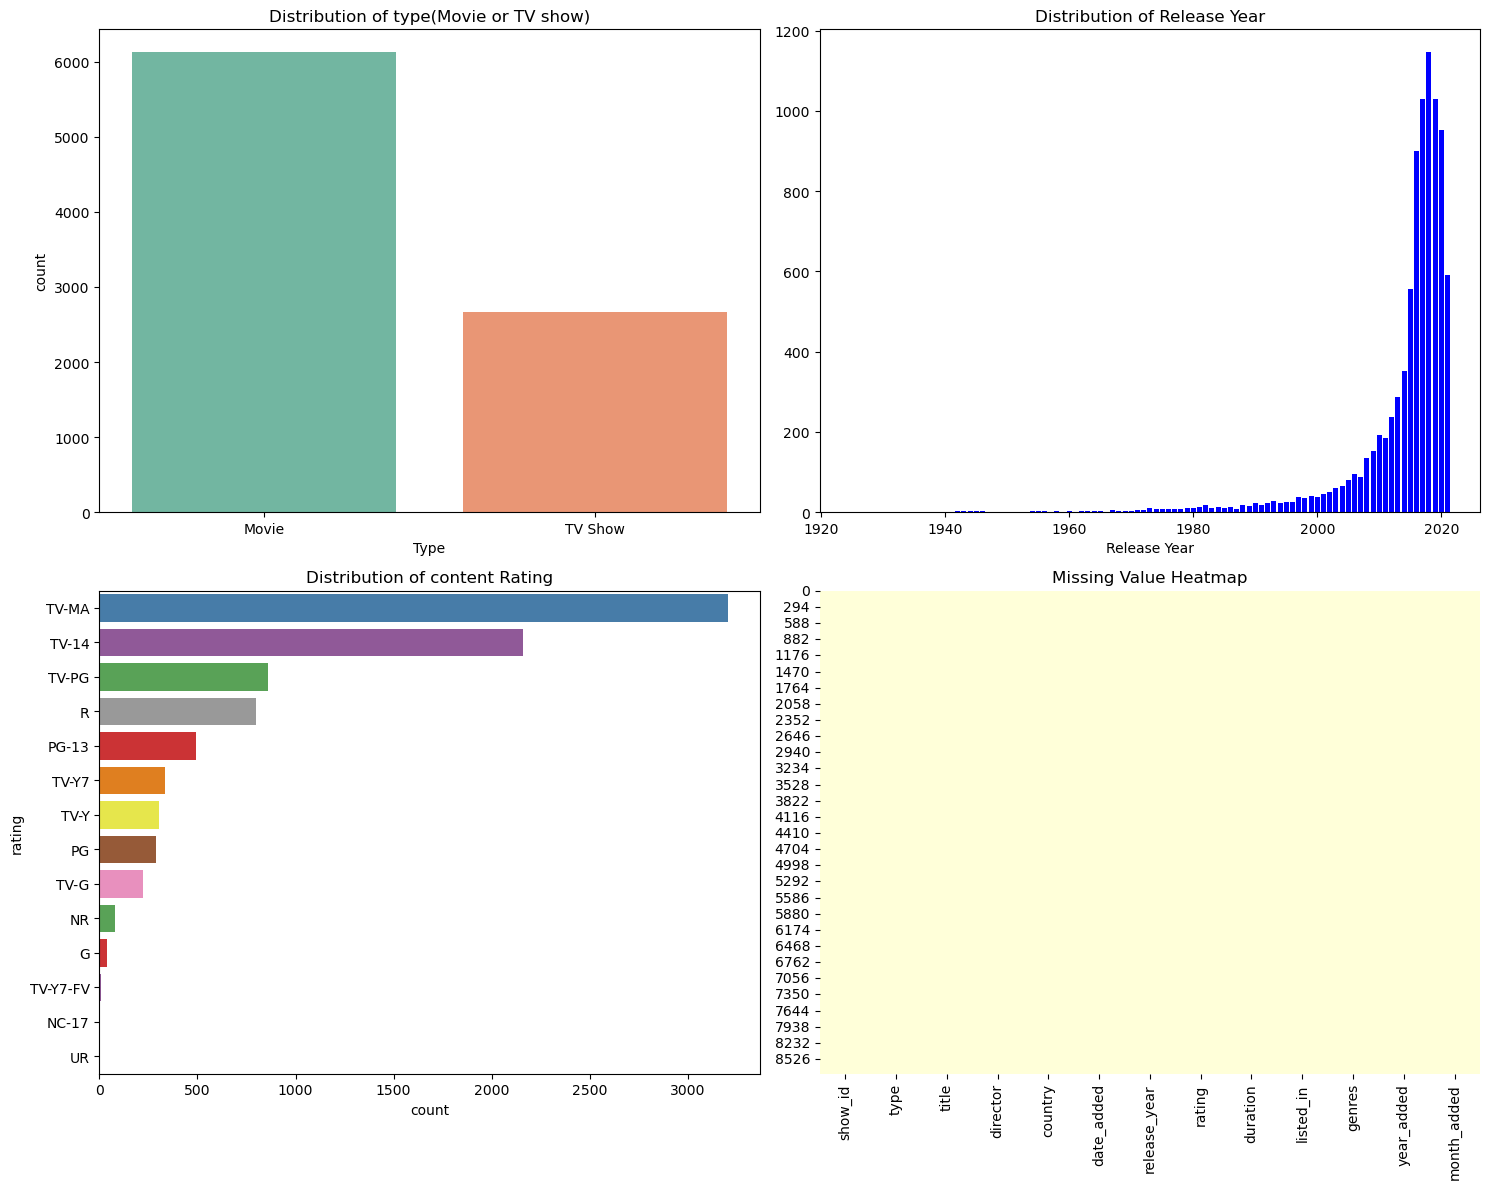

In [182]:
#plotting the distribution of 'type', 'release year' and 'rating'
fig, axes = plt.subplots(2,2, figsize=(15,12))

#plot: type distribution(movies/ tv shows)
sns.countplot(ax=axes[0,0], data=netflix_data, x='type',palette='Set2', hue='type', legend=False)
axes[0,0].set_title('Distribution of type(Movie or TV show)', fontsize=12)
axes[0,0].set_xlabel('Type')

#plot: Release year distribution
axes[0,1].bar(release_year_distribution.index, release_year_distribution.values, color='blue')
axes[0,1].set_title('Distribution of Release Year', fontsize=12)
axes[0,1].set_xlabel('Release Year')

#plot: rating Distribution
sns.countplot(ax=axes[1,0], data=netflix_data, y='rating', palette='Set1', order=rating_distribution.index, hue = 'rating', legend=False)
axes[1,0].set_title('Distribution of content Rating', fontsize=12)

#plot: Missing value heatmap
sns.heatmap(netflix_data.isnull(), cbar=False, cmap="YlGnBu", ax=axes[1,1])
axes[1,1].set_title('Missing Value Heatmap', fontsize=12)

plt.tight_layout()
plt.show()

EDA Findings
1. Missing values: No missing values were detected in amy of the columns
2. content type:: the dataset consist of 6126 Movies and 2664 TV shows, Showing that movie dominate the dataset
3. Release Year: The dataset include content spanning multiple decades with a consitent increase in release in more recent years.
4. Ratings:"TV-MA"(Mature Audience is the most commom rating, followed by "TV-14" and 'TV-PG'

In [185]:
#Most Common Genres
#Split the 'listed_in' columns and count genres
netflix_data['genres']= netflix_data['listed_in'].apply(lambda x: x.split(','))
all_genres=sum(netflix_data['genres'],[])
genre_count= pd.Series(all_genres).value_counts()
print(all_genres)
print(genre_count)

['Documentaries', 'Crime TV Shows', ' International TV Shows', ' TV Action & Adventure', 'TV Dramas', ' TV Horror', ' TV Mysteries', 'Children & Family Movies', ' Comedies', 'Dramas', ' Independent Movies', ' International Movies', 'British TV Shows', ' Reality TV', 'Comedies', ' Dramas', 'Children & Family Movies', ' Comedies', ' Music & Musicals', 'Dramas', ' International Movies', 'Children & Family Movies', ' Music & Musicals', 'Children & Family Movies', ' Comedies', 'Children & Family Movies', ' Comedies', 'Dramas', ' International Movies', ' Music & Musicals', 'Movies', 'Movies', 'Movies', 'Comedies', 'Docuseries', ' Reality TV', 'British TV Shows', ' Crime TV Shows', ' Docuseries', 'Children & Family Movies', "Kids' TV", "Kids' TV", "Kids' TV", 'Children & Family Movies', 'Crime TV Shows', ' International TV Shows', ' TV Action & Adventure', 'Documentaries', ' International Movies', 'Children & Family Movies', 'Crime TV Shows', ' Docuseries', ' International TV Shows', 'Childre

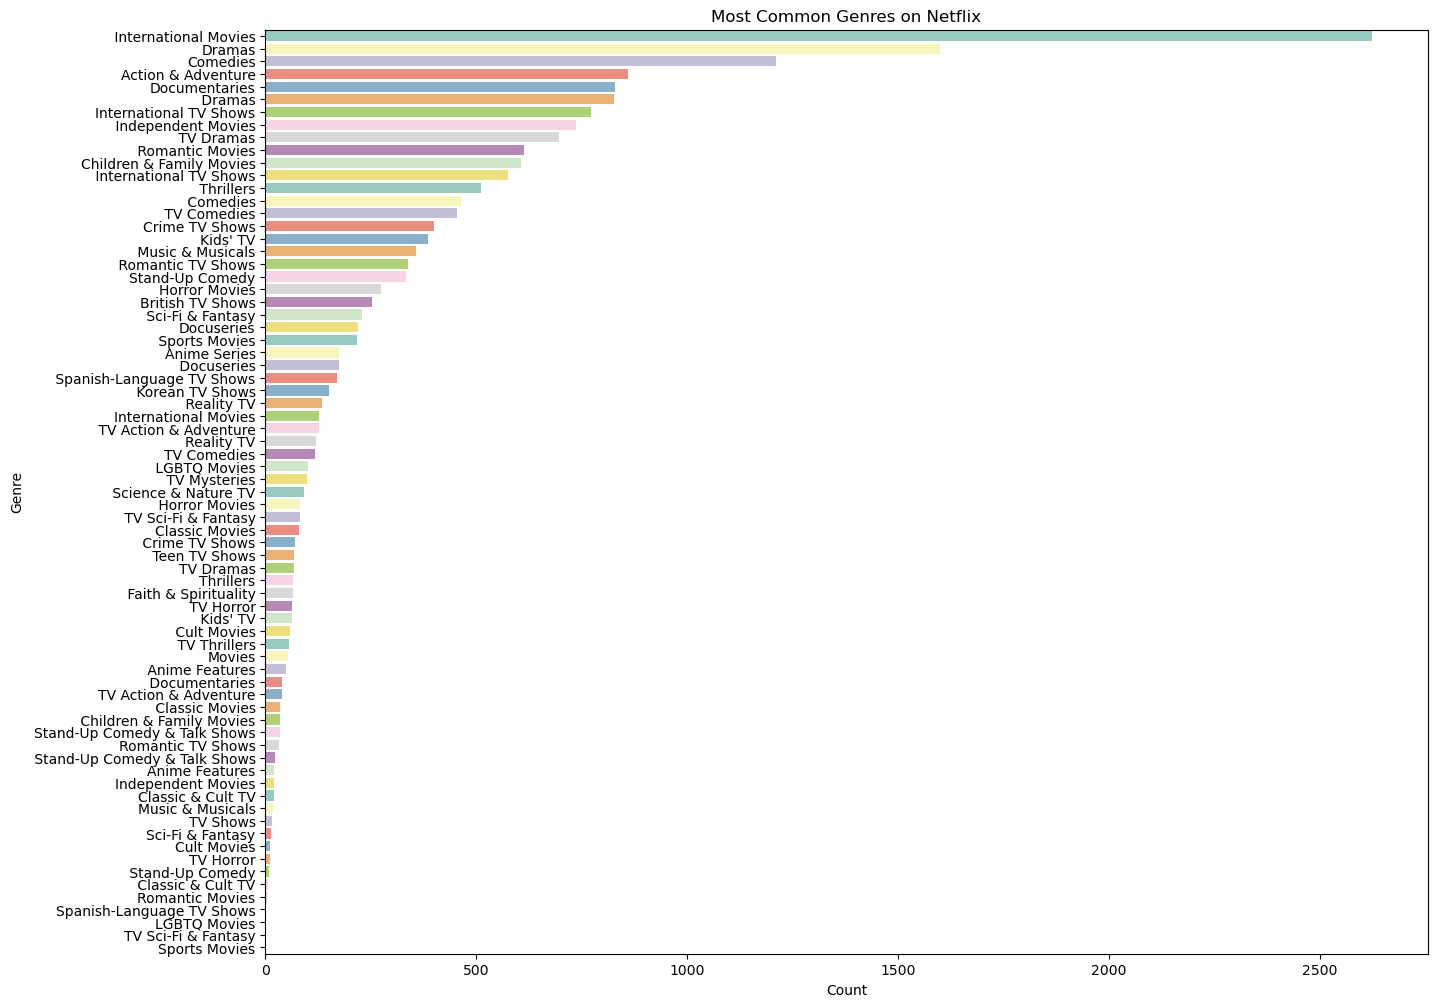

In [186]:
#plot the most commom genres
plt.figure(figsize=(15,12))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='Set3',hue=genre_count.index, legend=False)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [187]:
netflix_data.head(1)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9


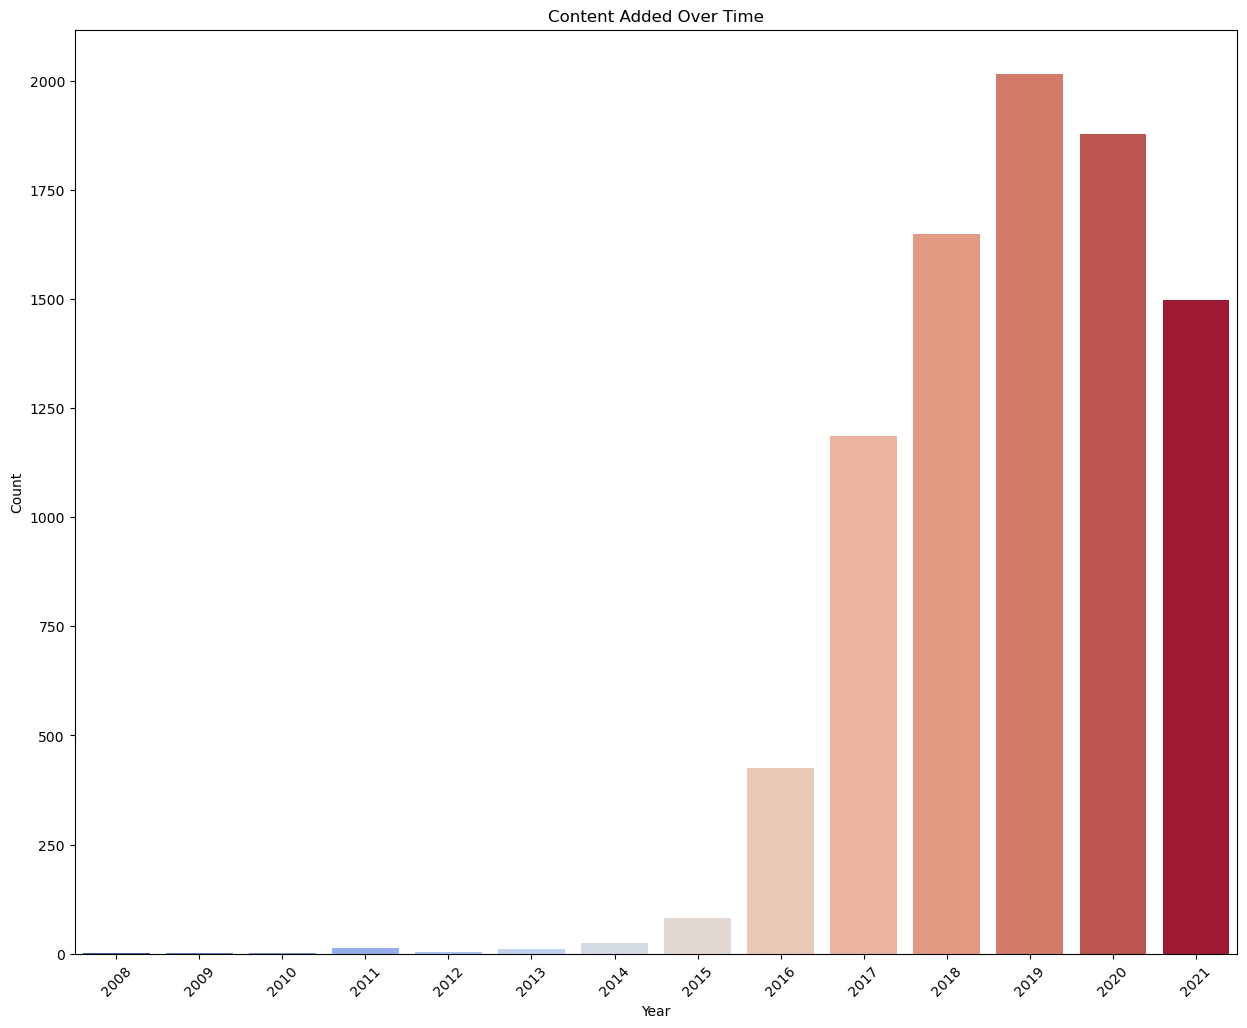

In [189]:
#Content added over time
#extract year and month from date_added
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_added'] = netflix_data['date_added'].dt.month

#plot content added over the years
plt.figure(figsize=(15,12))
sns.countplot(x='year_added', data=netflix_data, palette='coolwarm',hue='year_added', legend=False)
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

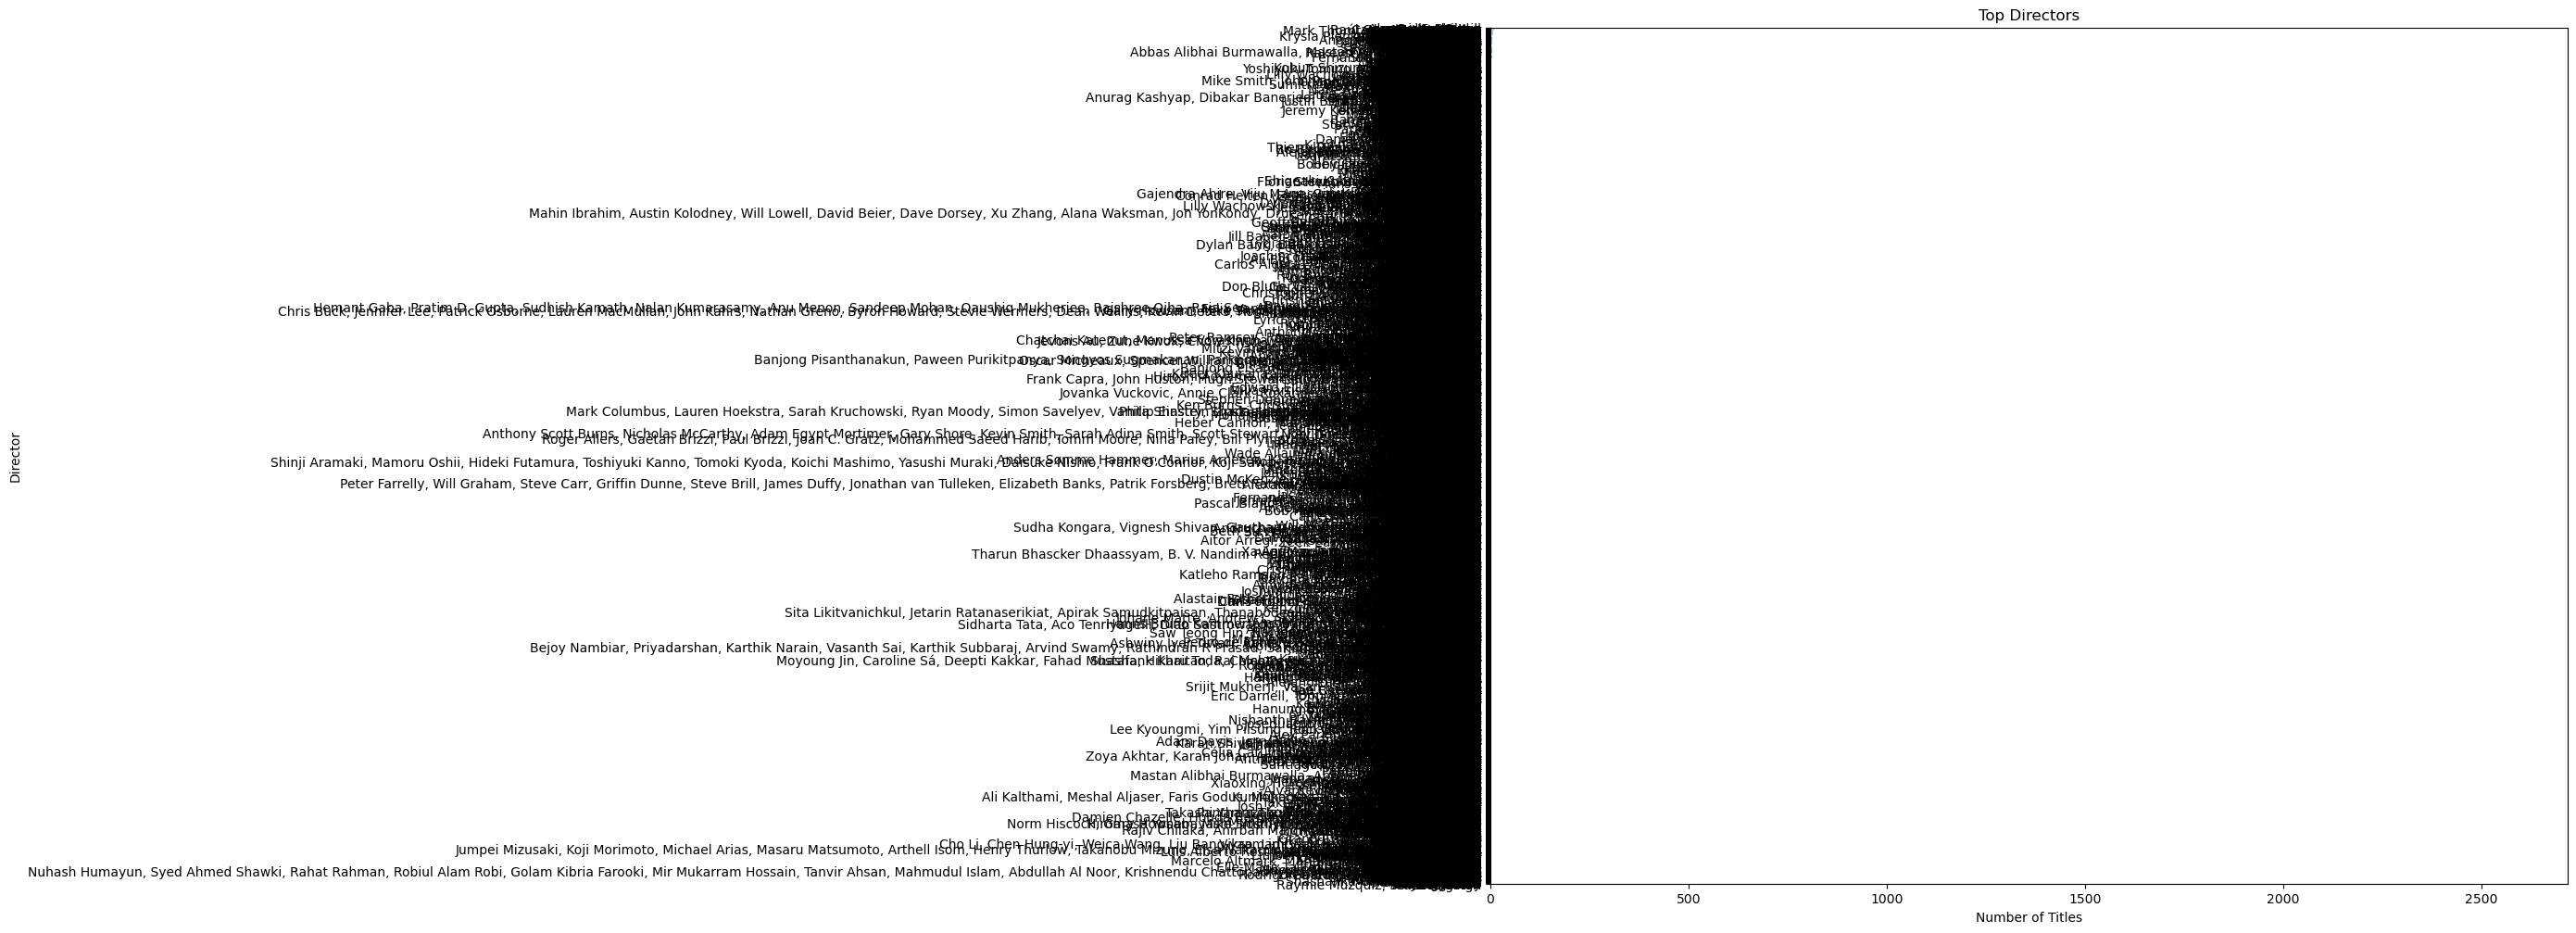

In [207]:
#Top 10 directors with the most title
#count the titles by director
top_director= netflix_data['director'].value_counts()
top_director.head(3)

#plot top directors
plt.figure(figsize=(15,12))
sns.barplot(x=top_director.values, y=top_director.index, palette='Blues_d', hue=top_director.index, legend=False)
plt.title('Top Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

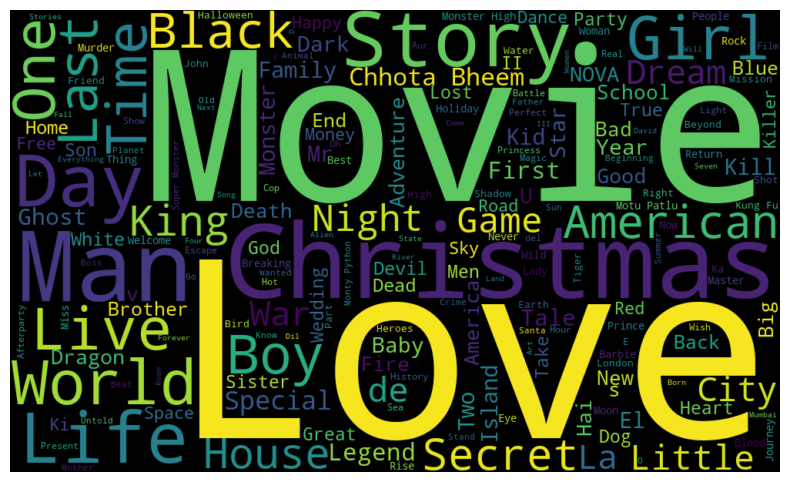

In [213]:
#Word Cloud of Movie Titles
movie_titles = netflix_data[netflix_data['type']=="Movie"]['title']
wordcloud = WordCloud(width=1000, height=600, background_color='black').generate(' '.join(movie_titles))

#plot word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()